## HuggingFace Library

### Pipeline

The most basic object in the Transformers library is the pipeline() function.It connects a model with its necessary preprocessing and postprocessing steps allows us to directly input any text and get an intelligible answer:

Some of the most currently available pipelines are:

1. feature-extraction(get the vector representation of a text)
2. fill-mask
3. ner (named entity recognition)
4. question-answering
5. sentiment-analysis
6. summarization
7. text-generation
8. translation
9. zero-shot-classification


In [3]:
!pip3 install transformers

In [7]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use mps:0


In [8]:
classifier("The experience with apple customer care has been horrible.")

[{'label': 'NEGATIVE', 'score': 0.9996960163116455}]

Based on the task the pipeline will select a model by default for 

sentiment-analysis - default model is `distilbert/distilbert-base-uncased-finetuned-sst-2-english`

zero-shot-classification  - default model is `facebook/bart-large-mnli` in hugging face models

In [6]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "The new movie was absolutely fantastic!",
    candidate_labels=["positive", "negative", "neutral"]
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use mps:0


{'sequence': 'The new movie was absolutely fantastic!',
 'labels': ['positive', 'neutral', 'negative'],
 'scores': [0.9814923405647278, 0.01151829119771719, 0.006989418063312769]}

In [9]:
generator = pipeline("text-generation", model="gpt2")
generator("In a distant future, humanity has", max_length=50, num_return_sequences=1)

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/opt/anaconda3/lib/python3.12/site-packages/transformers/pytorch_utils.py:335: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_elements = torch.tensor(test_elements)
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers

[{'generated_text': 'In a distant future, humanity has evolved into a race of intelligent machines. Each of them has its own unique set of skills. But in order to truly understand our role in this world, it is essential to understand their unique strengths and weaknesses.\n\n"You\'re not going to find a robot that can do what you want to do without a heart. You\'re not going to find a robot that will do it if it can handle its actions. You\'re not going to find a robot with a personality that\'s capable of doing what you want to do without being able to do it."\n\nThe future of humanity\n\nBut the future of humanity is a great many things. For instance, there is no way to know whether or not we will be able to save the planet and save the people of Earth. So we are going to have to figure out what to do with everything that is left.\n\nWhat do we do? We go about our day to day business. We go about our daily lives. We go about our work, our leisure activities. We go about our family li

In [10]:
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models in the AI space.", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use mps:0


[{'score': 0.15742401778697968,
  'token': 27930,
  'token_str': ' predictive',
  'sequence': 'This course will teach you all about predictive models in the AI space.'},
 {'score': 0.12131430953741074,
  'token': 774,
  'token_str': ' role',
  'sequence': 'This course will teach you all about role models in the AI space.'}]

### question-answering

question-answering will responsed to the question based on the context provided to the model.

There are two types of question answering:

1. Extractive : Where it will extract the piece of context based on the question, won't modify anything.
2. Generative : Here we will use encoder-decorder architecture, by passing both the question and context, it will generate embeddings and pass the embedding until we get the final response.

In [11]:
question_answerer = pipeline("question-answering")
context = "Transformers provide state-of-the-art general-purpose architectures for Natural Language Understanding and Natural Language Generation."
question_answerer(question="What do transformers provide?", context=context)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use mps:0


{'score': 0.5571836233139038,
 'start': 21,
 'end': 67,
 'answer': 'state-of-the-art general-purpose architectures'}

In [ ]:
summarizer = pipeline("summarization")
summarizer(
    "Transformers are a type of model architecture that has revolutionized the field of natural language processing. They are designed to handle sequential data and have been particularly successful in tasks such as language translation, text summarization, and question answering. The key innovation of transformers is the self-attention mechanism, which allows the model to weigh the importance of different words in a sentence when making predictions. This has led to significant improvements in performance compared to previous architectures like RNNs and LSTMs."
)

### Loading New Model

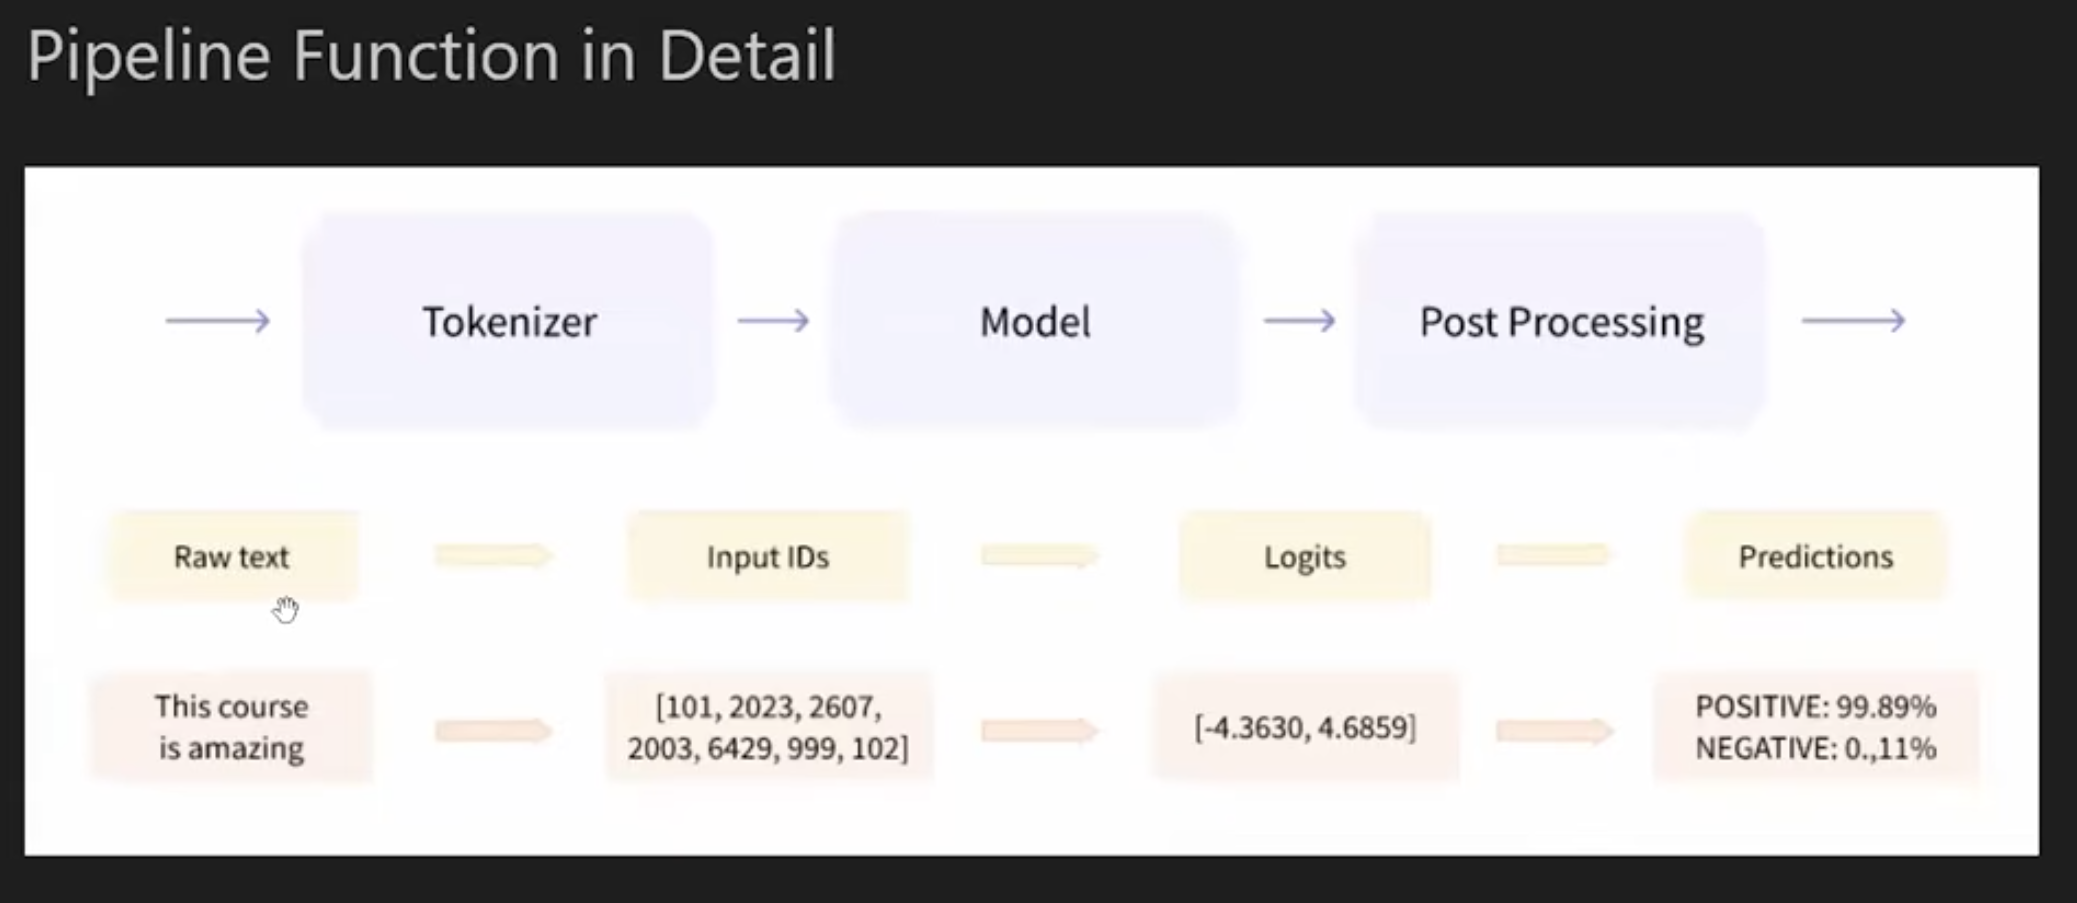

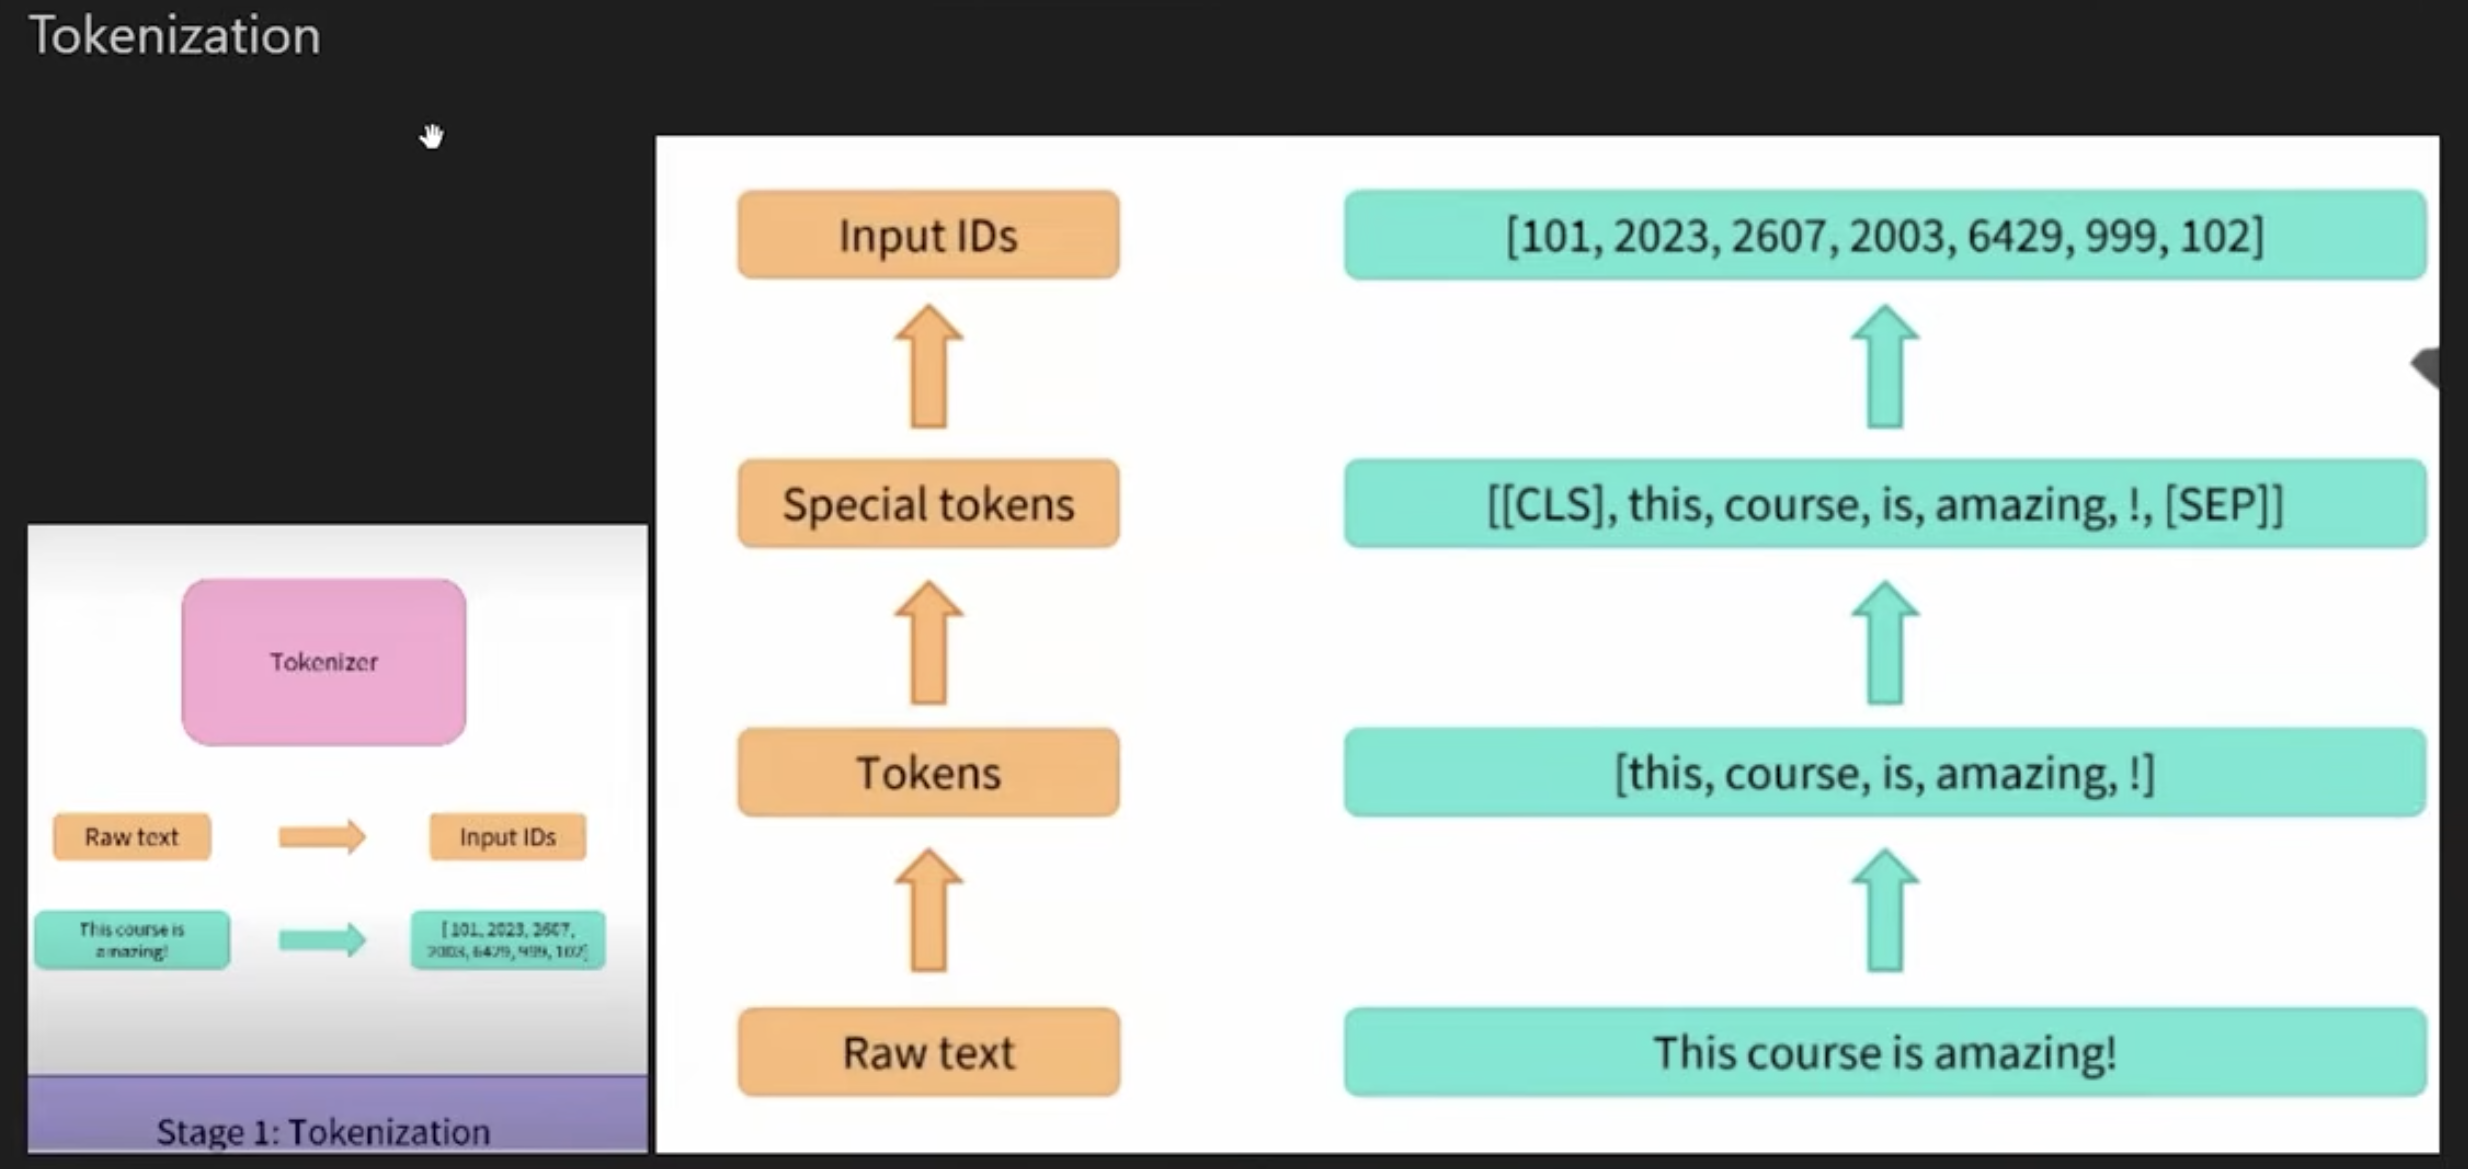

In [14]:
from transformers import AutoModel

model = AutoModel.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [15]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

raw_inputs = [
    "I love using transformers for natural language processing tasks!",
    "The movie was terrible and I would not recommend it to anyone."
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  1045,  2293,  2478, 19081,  2005,  3019,  2653,  6364,  8518,
           999,   102,     0,     0,     0],
        [  101,  1996,  3185,  2001,  6659,  1998,  1045,  2052,  2025, 16755,
          2009,  2000,  3087,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [16]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 15, 768])


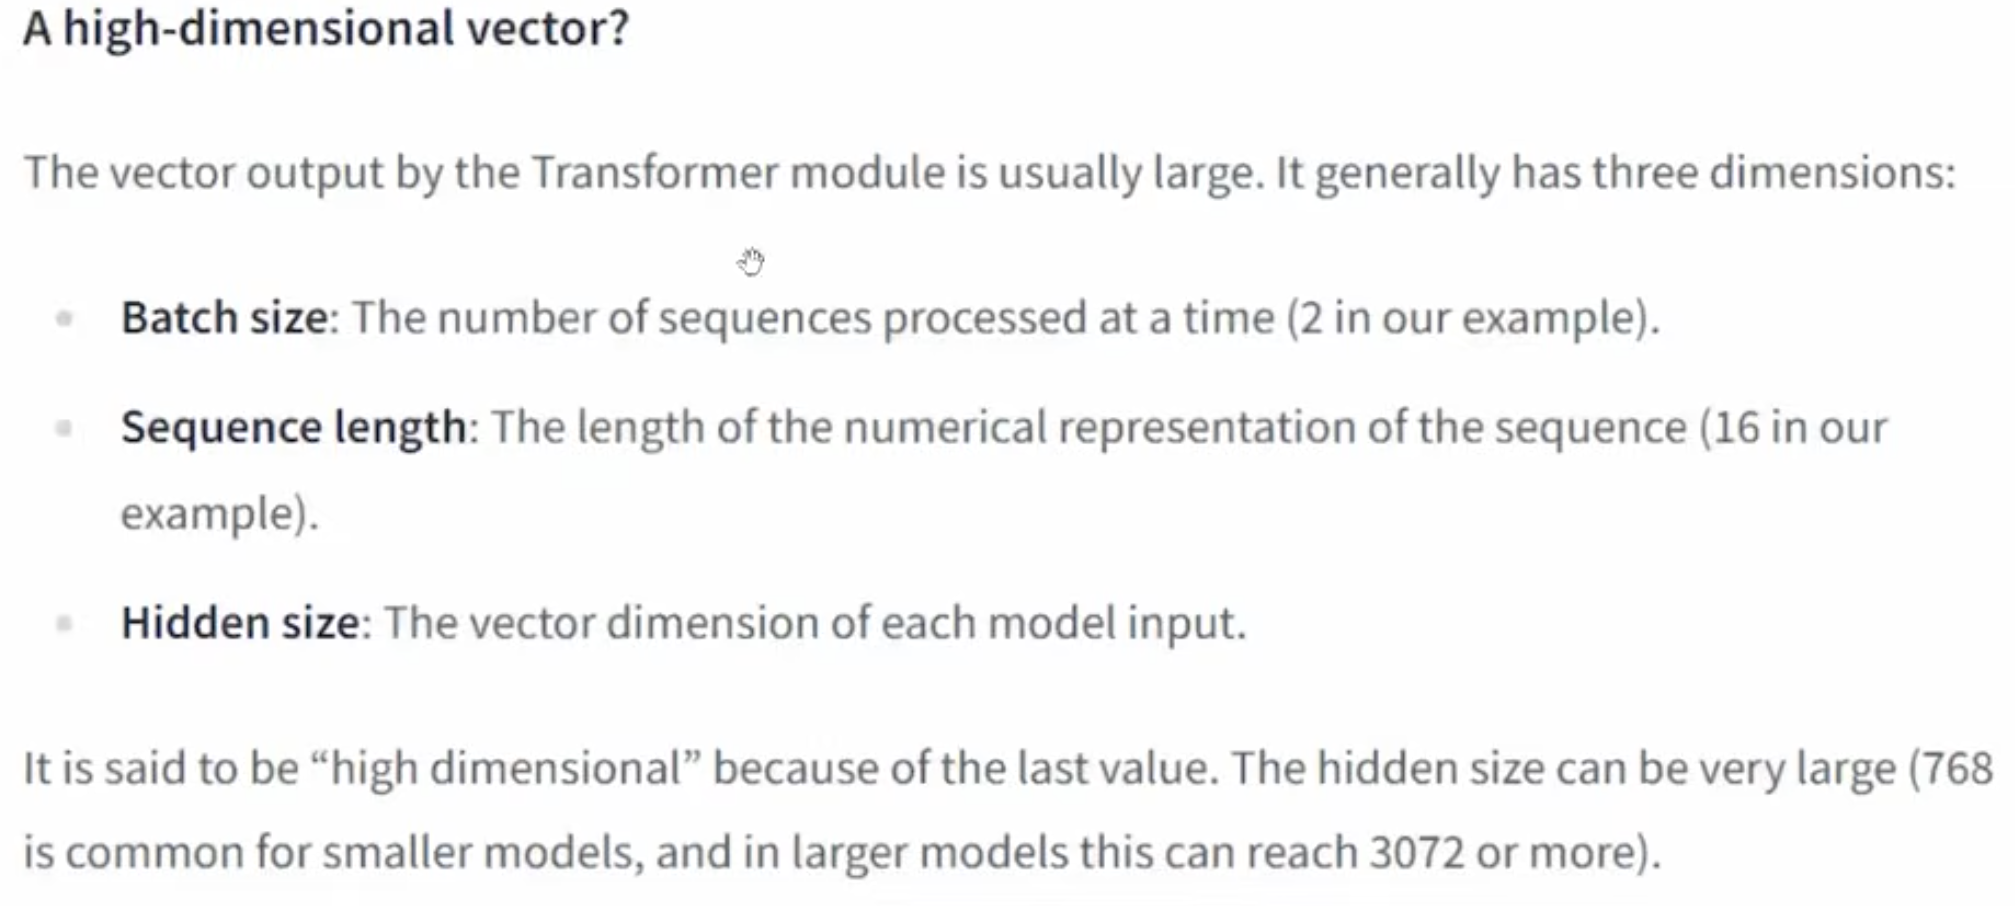

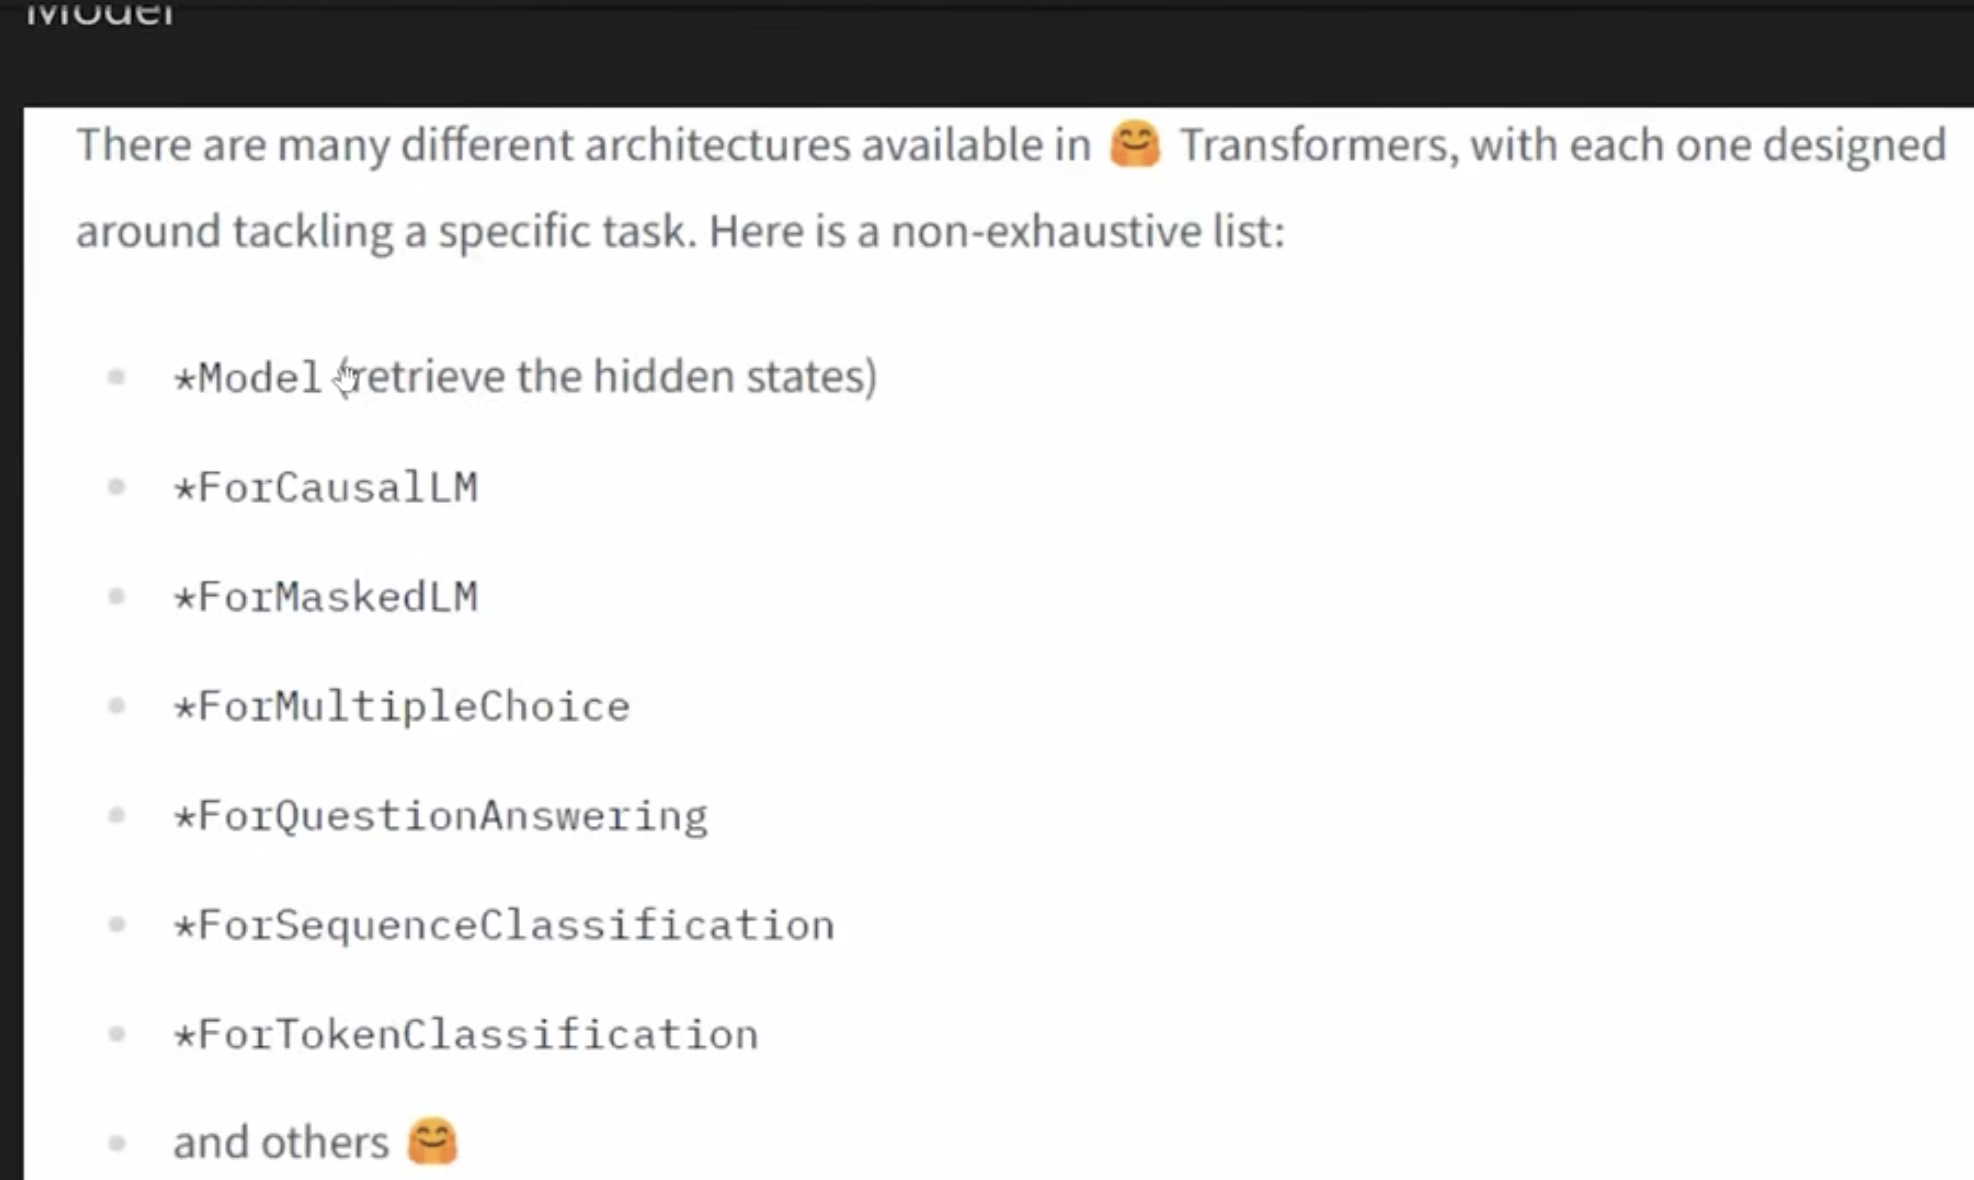

In [17]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
outputs = model(**inputs)
print(outputs.logits.shape)

torch.Size([2, 2])


In [18]:
outputs.logits

tensor([[-3.1707,  3.3767],
        [ 3.3790, -2.8816]], grad_fn=<AddmmBackward0>)

### PostProcessing

In [19]:
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions

tensor([[0.0014, 0.9986],
        [0.9981, 0.0019]], grad_fn=<SoftmaxBackward0>)

In [20]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}